## Independent Component Analysis (ICA)

ICA is a method used to **find hidden independent sources from observed mixed signals**. Imagine you have several signals that have been combined together, and you want to separate them back into their original independent parts.

This is useful when the data you see is actually a mixture of different underlying signals, but you only observe the combined results.

---

## Statistical Independence

* **What does statistical independence mean?**
  It means that two variables are completely unrelated — knowing the value of one gives you no clue about the other. For example, the height of a person and the number of letters in their name are generally independent.

* **Why is it important for ICA?**
  ICA looks for components that are **statistically independent**, not just uncorrelated. Uncorrelated means they don’t vary together linearly, but they might still have some hidden dependency. Statistical independence is a stronger condition, ensuring the components truly come from separate sources.

---

## Source Separation

* **What is source separation?**
  It is the process of recovering the original signals (sources) from the mixed signals you observe.

* **Real-world example:**
  Imagine you are at a party with many people talking at once, and you have multiple microphones placed around the room. Each microphone records a mixture of all voices. ICA can help separate these recordings into individual voices — so you can hear each person clearly.

* **How does ICA do it?**
  ICA assumes the observed data is a mix of independent sources combined linearly. It finds an "unmixing" matrix to reverse this mixing, separating the mixed data into independent components.

---

## Summary

| Concept                              | Explanation                                                                |
| ------------------------------------ | -------------------------------------------------------------------------- |
| Independent Component Analysis (ICA) | Technique to separate mixed signals into original independent parts        |
| Statistical Independence             | Variables or signals are completely unrelated and do not affect each other |
| Source Separation                    | Extracting original independent signals from observed mixtures             |


## Step 1: Original Independent Signals (Sources)

We start with two independent signals (or sources):

$$
s_1 = [1, 2, 3]
$$

$$
s_2 = [4, 5, 6]
$$

These signals are independent, meaning knowing one does not tell you anything about the other.

---

## Step 2: Mixing the Signals

We do **not observe** the original signals directly. Instead, we observe mixtures of these signals.

A mixing matrix $A$ combines them linearly:

$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

The observed signals $X$ are:

$$
X = A \times S
$$

Calculate each observed signal:

* For first observed signal $x_1$:

$$
x_1 = 1 \times s_1 + 2 \times s_2 = [1*1 + 2*4, \quad 1*2 + 2*5, \quad 1*3 + 2*6] = [9, 12, 15]
$$

* For second observed signal $x_2$:

$$
x_2 = 3 \times s_1 + 4 \times s_2 = [3*1 + 4*4, \quad 3*2 + 4*5, \quad 3*3 + 4*6] = [19, 26, 33]
$$

So the observed mixed data is:

$$
X = \begin{bmatrix}
9 & 12 & 15 \\
19 & 26 & 33
\end{bmatrix}
$$

---

## Step 3: Goal — Recover Original Signals

Given only the observed mixed signals $X$, we want to find an **unmixing matrix** $W$ such that:

$$
S = W \times X
$$

This matrix $W$ tries to "undo" the mixing by approximating the inverse of $A$:

$$
W \approx A^{-1}
$$

Using $W$, we hope to recover the original signals $s_1$ and $s_2$.

---

## Step 4: How ICA Finds $W$

* ICA algorithms estimate $W$ by maximizing **statistical independence** between the recovered signals.
* They search for components in $S$ that do not depend on each other (independent).
* Unlike PCA, ICA looks beyond simple uncorrelation and finds truly independent components.

---

## Step 5: Result

Once we find $W$, we multiply it by the observed data $X$:

$$
S = W \times X
$$

and ideally get back the original independent sources:

$$
s_1 = [1, 2, 3], \quad s_2 = [4, 5, 6]
$$

---

### Summary Table:

| Step            | Explanation                                 |
| --------------- | ------------------------------------------- |
| 1. Sources      | Start with independent signals $s_1, s_2$   |
| 2. Mixing       | Mix signals using matrix $A$ to get $X$     |
| 3. Observations | Only see mixed signals $X$, not sources     |
| 4. Unmixing     | Find matrix $W$ to recover sources from $X$ |
| 5. ICA Method   | Estimate $W$ by maximizing independence     |



In [11]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [12]:
# Step 1: Original independent signals (sources)
s1 = np.array([1, 2, 3])
s2 = np.array([4, 5, 6])
S = np.vstack([s1, s2])  # Shape (2, 3)

print("Original sources (S):")
print(S)

# Step 2: Mixing matrix
A = np.array([[1, 2],
              [3, 4]])

# Step 3: Generate mixed signals
X = A @ S  # Matrix multiplication
print("\nMixed signals (X):")
print(X)

# Step 4: Apply ICA to recover sources
ica = FastICA(n_components=2)
S_estimated = ica.fit_transform(X.T).T  # Transpose for sklearn, then back

print("\nRecovered sources (estimated S):")
print(S_estimated)

Original sources (S):
[[1 2 3]
 [4 5 6]]

Mixed signals (X):
[[ 9 12 15]
 [19 26 33]]

Recovered sources (estimated S):
[[-1.22474487  0.          1.22474487]
 [ 1.22474487  0.         -1.22474487]]


e:\Important\Skills\ML-Algo\env\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


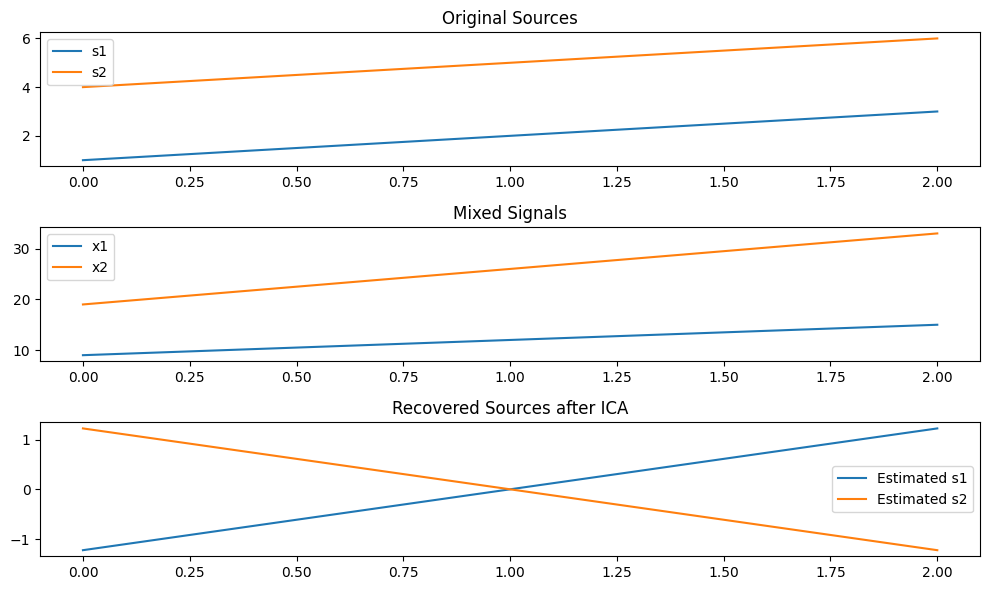

In [13]:


# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X[0], label='x1')
plt.plot(X[1], label='x2')
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Recovered Sources after ICA")
plt.plot(S_estimated[0], label='Estimated s1')
plt.plot(S_estimated[1], label='Estimated s2')
plt.legend()

plt.tight_layout()
plt.show()


### Why use ICA?

1. **Separate Mixed Signals:**
   Often, real-world data we observe are mixtures of several underlying independent sources. ICA helps us **unmix** these to find the original, meaningful signals.

2. **Find Hidden Factors:**
   Sometimes, data is generated by unknown independent processes. ICA helps discover these hidden factors without prior knowledge.

3. **Applications in Real Life:**

   * **Audio processing:** Separate different voices or sounds recorded together (e.g., “cocktail party problem”).
   * **Medical imaging:** Extract brain signals like EEG or fMRI components.
   * **Finance:** Identify independent factors affecting market movements.
   * **Image processing:** Separate overlapping images or textures.

4. **More Powerful than PCA for Certain Problems:**
   While PCA finds uncorrelated components, ICA finds statistically **independent** components, which is a stronger and often more useful condition for separating sources.

---

### In short:

We use ICA when we want to **recover original independent signals or sources from observed mixed data**, especially when those sources are unknown and mixed in complex ways.
